# CHILDCARE FACILITIES
First of all we have to find data which will help to solve this problem . 
The source of data is ONS (Office for National Statistics,https://data.london.gov.uk/dataset/pubs-clubs-restaurants-takeaways-borough ). 
Secondly , we <<clear >> the data because we want to have correct and useful data. After , we choose which data we are gonna use to analyze. 
Finally , we use the library seaborn and few methods to analyze the data. 
The conclusion of analyzing of data is that the areas which have the biggest number of borns are ‘London’ and ‘city of London. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 1 to 4
Data columns (total 2 columns):
Area name    4 non-null object
2001         4 non-null float64
dtypes: float64(1), object(1)
memory usage: 148.0+ bytes


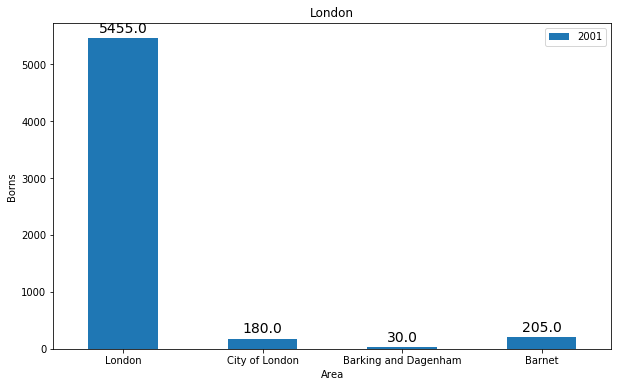

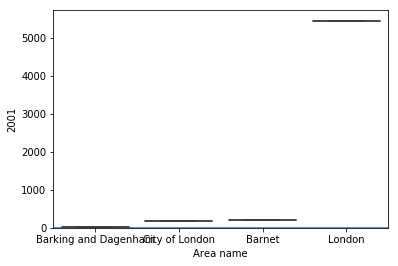

In [35]:

import requests 
import pandas as pd 
import numpy as np 
import random 
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e11594f5c7b24d648b715f6c8540768e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='emawb47Qh1w5SC5l2xo0hLNXGbbBRO4DsynNpXd4ht8V',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_e11594f5c7b24d648b715f6c8540768e.get_object(Bucket='cour-donotdelete-pr-bzm9enjttrefej',Key='licensed-restaurants-cafes-borough.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_excel(body)
df=df.iloc[1:5,1:3]
df.info()
df.describe()
df.columns = list(map(str, df.columns))
all(isinstance(column, str) for column in df.columns)

dfp = df[['Area name','2001']]

dfp.set_index('Area name',inplace = True)

ax = dfp.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Borns') # add to x-label to the plot
ax.set_xlabel('Area') # add y-label to the plot
ax.set_title('London') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()
df.sort_values(['2001'], ascending = True, axis = 0, inplace = True )
import seaborn as sns
sns.distplot(df['2001'],bins=15)
sns.boxplot(x='Area name', y= '2001', data=df)